In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

In [3]:
input_data = []
correct_data = []

for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):
            correct_data.append([0, 1])
        else:
            correct_data.append([1, 0])

In [4]:
n_data = len(correct_data)
input_data = np.array(input_data)
correct_data = np.array(correct_data)

In [5]:
n_in = 2
n_mid = 6
n_out = 2

In [6]:
wb_width = 0.01
eta = 0.05
epoch = 101
interval = 10

In [7]:
class MiddleLayer:
    def __init__(self, n_upper, n):  # n_upper: 입력의 수, n: 출력의 수
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u))  # 활성화 함수: sigmoid
        
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [8]:
class OutputLayer:
    def __init__(self, n_upper, n):  # n_upper: 입력의 수, n: 출력의 수
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u) / np.sum(np.exp(u), axis=1, keepdims=True)  # 활성화 함수: softmax
        
    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [9]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

In [10]:
sin_data = np.sin(np.pi * X)

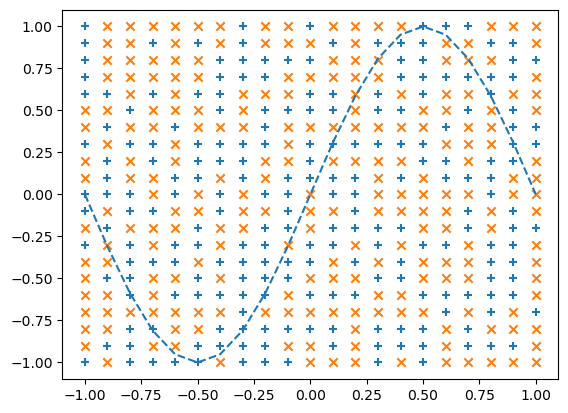

Epoch:0/101 Error:0.704436242159778


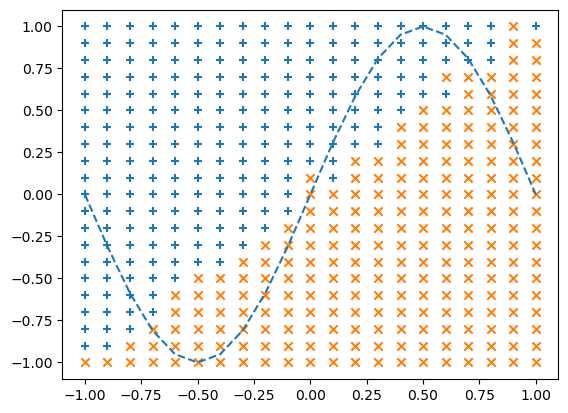

Epoch:10/101 Error:0.40232632977849186


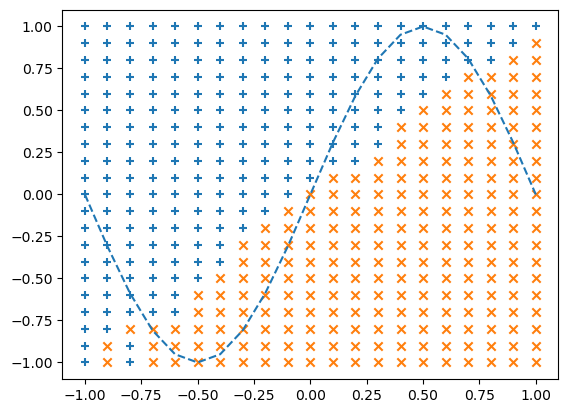

Epoch:20/101 Error:0.3934422469625045


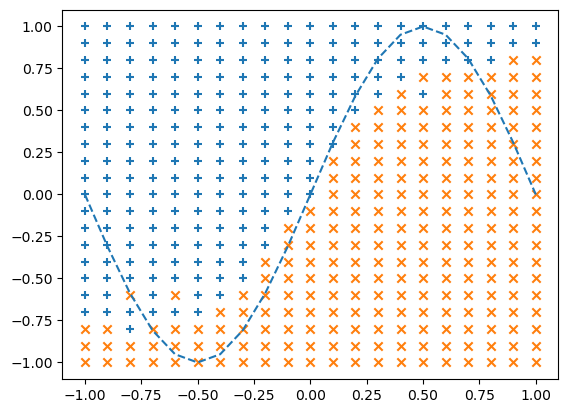

Epoch:30/101 Error:0.29382192016175324


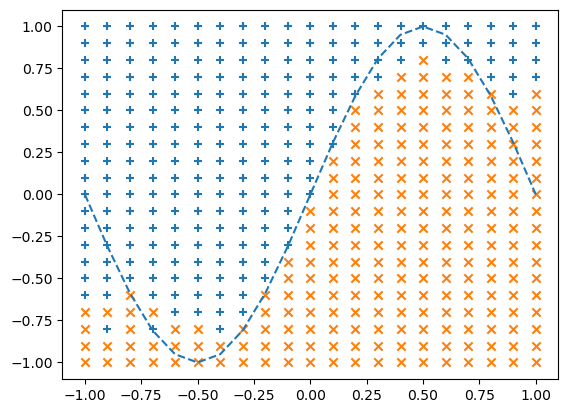

Epoch:40/101 Error:0.23814279986018166


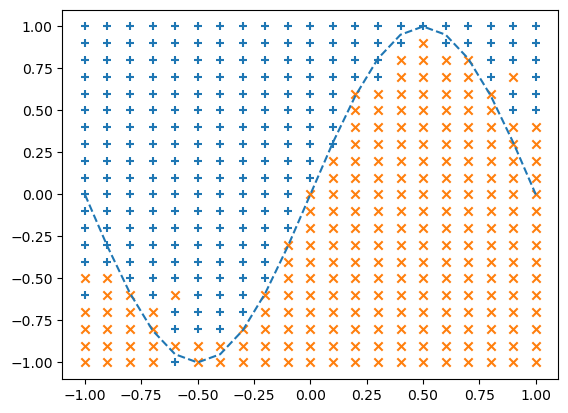

Epoch:50/101 Error:0.2020871057719649


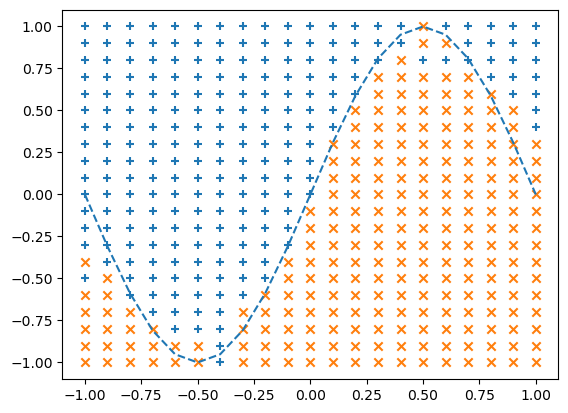

Epoch:60/101 Error:0.18055358926897427


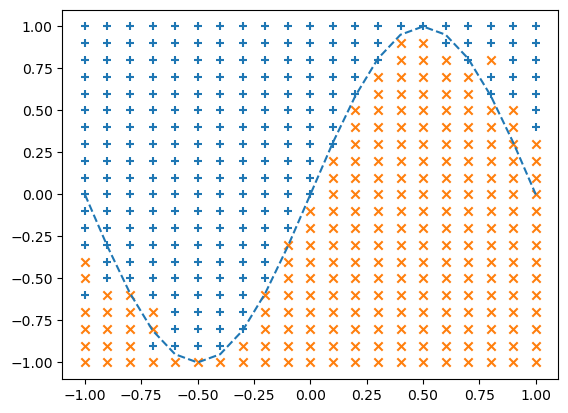

Epoch:70/101 Error:0.16592856036135956


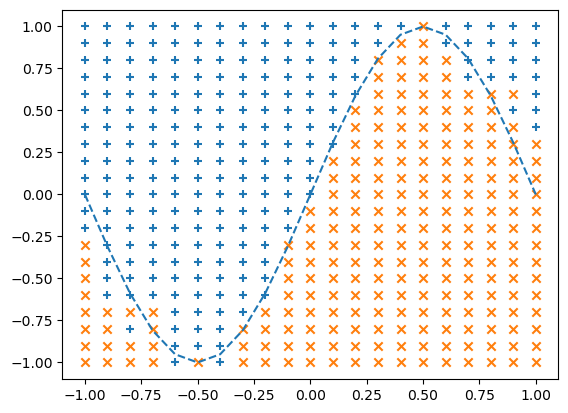

Epoch:80/101 Error:0.1567889458736632


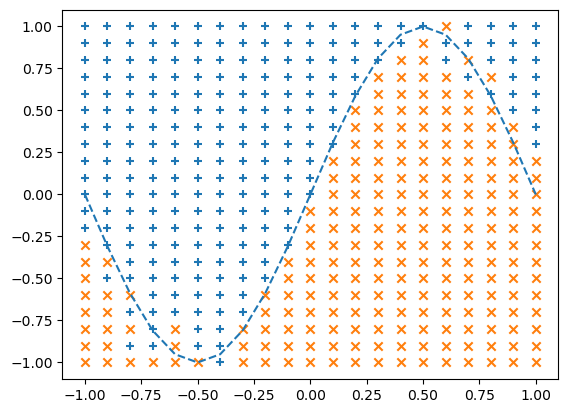

Epoch:90/101 Error:0.14400523142002083


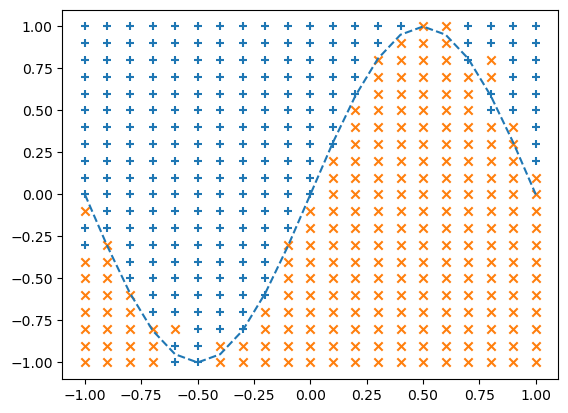

Epoch:100/101 Error:0.13679662405584034


In [11]:
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    x_1, y_1 = [], []
    x_2, y_2 = [], []
    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        
        middle_layer.forward(x.reshape(1, 2))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1, 2))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)
            total_error += -np.sum(t * np.log(y + 1e-7))  # 손실 함수: 교차 엔트로피
            
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
                
    if i % interval == 0:
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")
        plt.show()
        
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error / n_data))